# Myopia Dataset

In [19]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Clustering/Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# model preprocessing & metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Part 1: Prepare the Data

In [20]:
# Retrieve the data
df = pd.read_csv("myopia.csv")
y = df["MYOPIC"]
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [21]:
# Remove the "MYOPIC" column from the dataset
df.drop(["MYOPIC"], axis=1, inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [22]:
# Check for all numeric values and no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


/Users/raymondbell/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



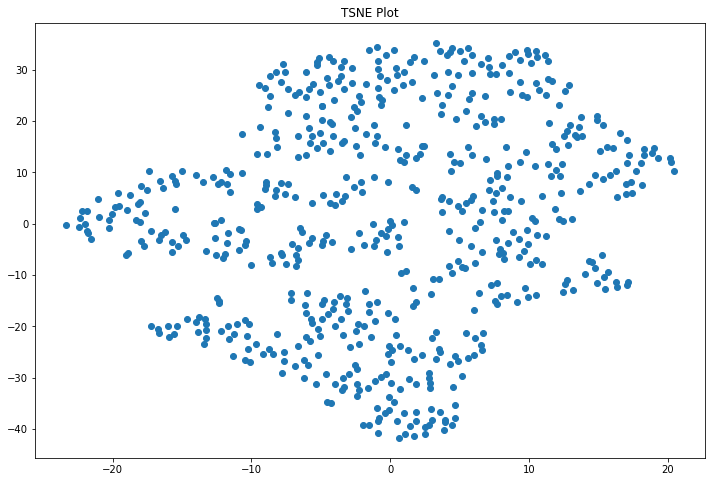

In [23]:
 # Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

In [24]:
# 3D tSNE
df2 = df.copy()
df2["MYOPIC"] = y
fig = px.scatter_3d(df2, x='AGE', y='SPHEQ', z='AL', color='AGE', symbol='MYOPIC')
fig.show()

In [25]:
df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [26]:
colswithOutliers = []
df.columns
for col in df.columns:
    mean = df[col].mean()
    dev = df[col].std()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    if df.loc[df[col] > Q3 + 1.5*IQR][col].count() > 0:
        colswithOutliers.append(col)
print(colswithOutliers)

['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR']


In [27]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.25,0.127588,0.427039,0.621110,0.467014,0.336735,1.000000,0.40,0.000000,0.000000,0.322581,0.323232,1.0,1.0
1,0.25,0.257740,0.532189,0.629229,0.375000,0.487245,0.088889,0.00,0.033333,0.066667,0.225806,0.101010,1.0,1.0
2,0.25,0.370341,0.555794,0.466847,0.480903,0.545919,0.311111,0.00,0.066667,0.000000,0.322581,0.121212,0.0,0.0
3,0.25,0.241372,0.493562,0.737483,0.565972,0.344388,0.400000,0.55,0.000000,0.000000,0.129032,0.353535,0.0,1.0
4,0.00,0.275291,0.727468,0.611637,0.428819,0.709184,0.311111,0.00,0.000000,0.000000,0.129032,0.020202,1.0,0.0


## Part 2: Apply Dimensionality Reduction

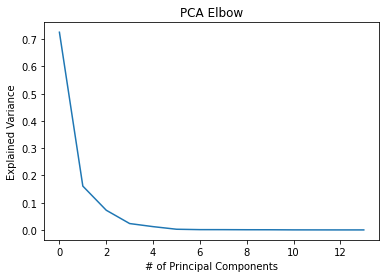

In [28]:
 # Initialize PCA model
pca = PCA()
pca.fit(df)
plt.plot(range(len(df.columns)), pca.explained_variance_ratio_)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Elbow")
plt.show()

In [29]:
list(zip(range(len(df.columns)), pca.explained_variance_ratio_))

[(0, 0.7255724892053265),
 (1, 0.16081428120782754),
 (2, 0.07227215489674389),
 (3, 0.02333858889043094),
 (4, 0.012045721818095921),
 (5, 0.002483938344980192),
 (6, 0.0010474125750545703),
 (7, 0.000963275380648177),
 (8, 0.0006603799884485654),
 (9, 0.0005714584698331089),
 (10, 0.00016195402559981615),
 (11, 6.833523602788601e-05),
 (12, 9.96098286008013e-09),
 (13, 2.4540296555961435e-33)]

When we examine the cell above, we can see that the first three components account for greater than 90% of the explainable variance in the raw or non-standardized dataset. When I ran this same code on a standardized dataset, I saw a nearly a 50% decrease, as standardizing, in effect, sort of distributes the influence of a few dimensions across more. For example, I notice a decrease from 72% to ~33% on the first dimension, suggesting 5 or more principal components instead of 3 to 4. Again, out of the original 14 features, 3 explained greater than 90% of the variance.

In [30]:
df.corr()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
AGE,1.000000,-0.118255,0.220784,0.191849,-0.185531,0.202472,0.057538,0.130194,0.056929,0.399324,0.069395,0.286820,-0.039515,-0.055427
SPHEQ,-0.118255,1.000000,-0.305512,-0.238784,0.072699,-0.247130,-0.022468,-0.099501,-0.031088,-0.054873,-0.080934,-0.120611,-0.131860,-0.140113
AL,0.220784,-0.305512,1.000000,0.456296,-0.328939,0.941916,0.112004,0.017944,0.086328,0.098326,0.077170,0.111527,0.046948,-0.010278
ACD,0.191849,-0.238784,0.456296,1.000000,-0.339291,0.199447,0.075161,0.011481,0.071666,0.051826,-0.042761,0.040157,0.115974,0.053746
LT,-0.185531,0.072699,-0.328939,-0.339291,1.000000,-0.451594,-0.032745,0.018481,-0.025345,-0.037580,0.049095,0.002875,-0.011127,-0.015586
VCD,0.202472,-0.247130,0.941916,0.199447,-0.451594,1.000000,0.096235,0.010120,0.069369,0.091759,0.082579,0.099774,0.009987,-0.025398
SPORTHR,0.057538,-0.022468,0.112004,0.075161,-0.032745,0.096235,1.000000,0.131597,0.010185,0.115844,0.173470,0.189365,-0.065167,0.002623
READHR,0.130194,-0.099501,0.017944,0.011481,0.018481,0.010120,0.131597,1.000000,0.035300,0.262374,0.003092,0.697522,-0.040312,0.010341
COMPHR,0.056929,-0.031088,0.086328,0.071666,-0.025345,0.069369,0.010185,0.035300,1.000000,0.114161,0.129655,0.495171,0.036116,0.023954
STUDYHR,0.399324,-0.054873,0.098326,0.051826,-0.037580,0.091759,0.115844,0.262374,0.114161,1.000000,0.042798,0.624156,-0.040136,-0.008783


In [31]:
pca = PCA(n_components=3)
pca.fit(df)

components = pd.DataFrame(pca.transform(df), columns=["PCA1", "PCA2", "PCA3"])

components.head()

,PCA1,PCA2,PCA3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


/Users/raymondbell/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning:

invalid value encountered in sqrt



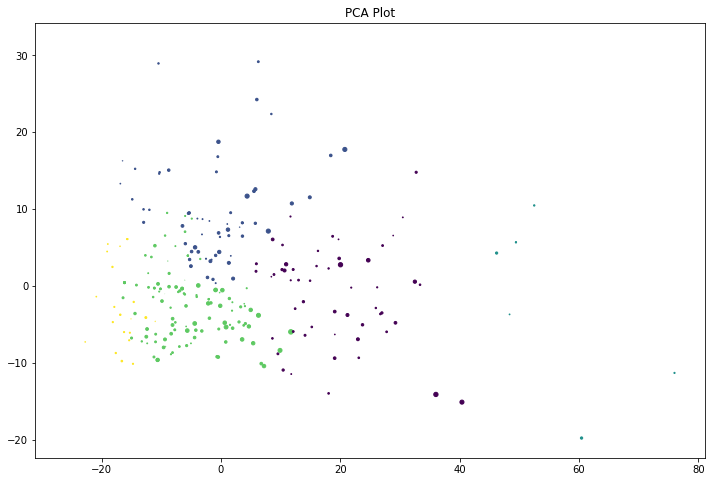

In [44]:
plt.figure(figsize=(12,8))

plt.scatter(components["PCA1"], components["PCA2"], components["PCA3"], c=preds)
plt.title("PCA Plot")
plt.show()

/Users/raymondbell/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



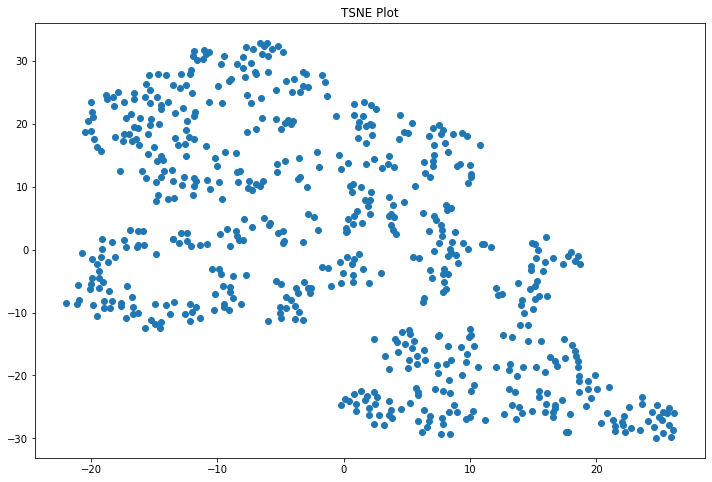

In [45]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(components)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

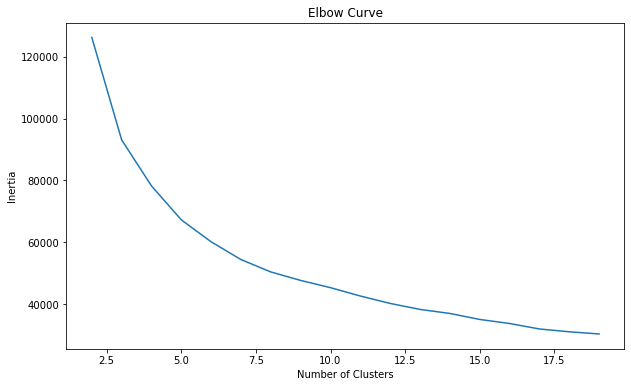

In [46]:
inertia = []
k_range = list(range(2, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    
    inertia.append(kmeans.inertia_)
    
# Create an elbow plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")

plt.show()

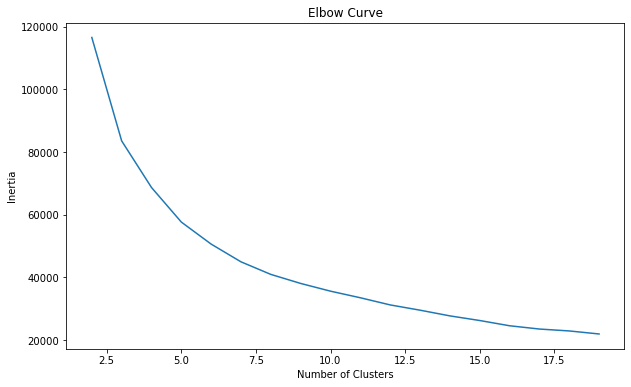

In [47]:
inertia = []
k_range = list(range(2, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(components)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")

plt.show()

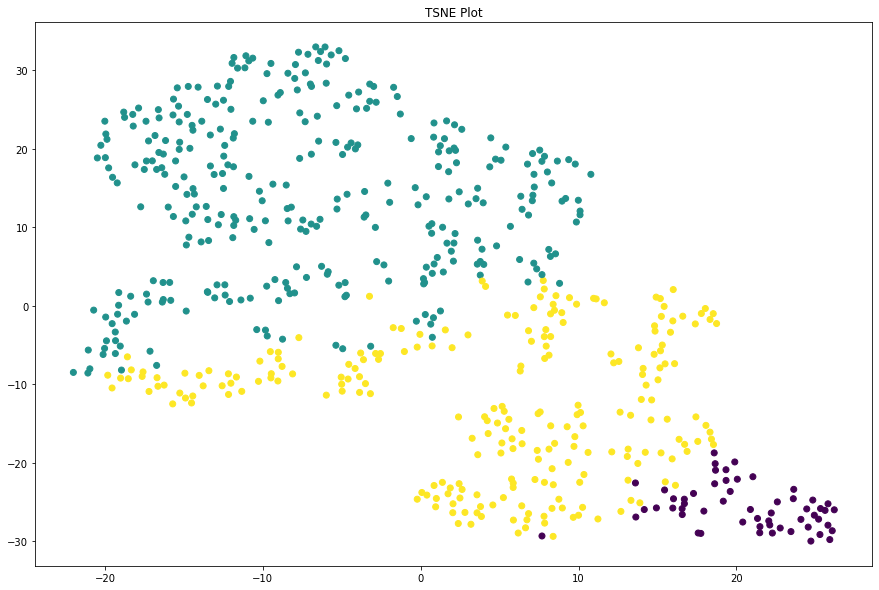

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

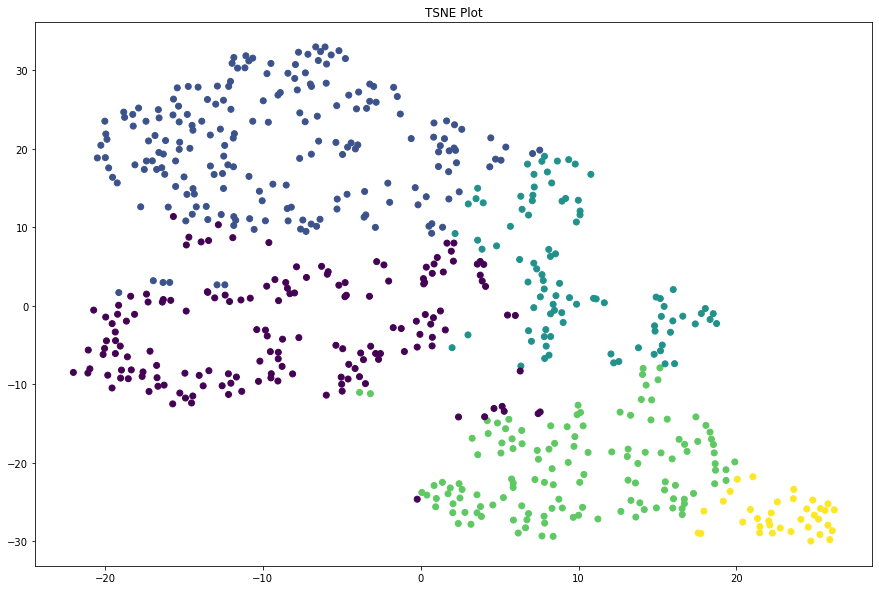

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

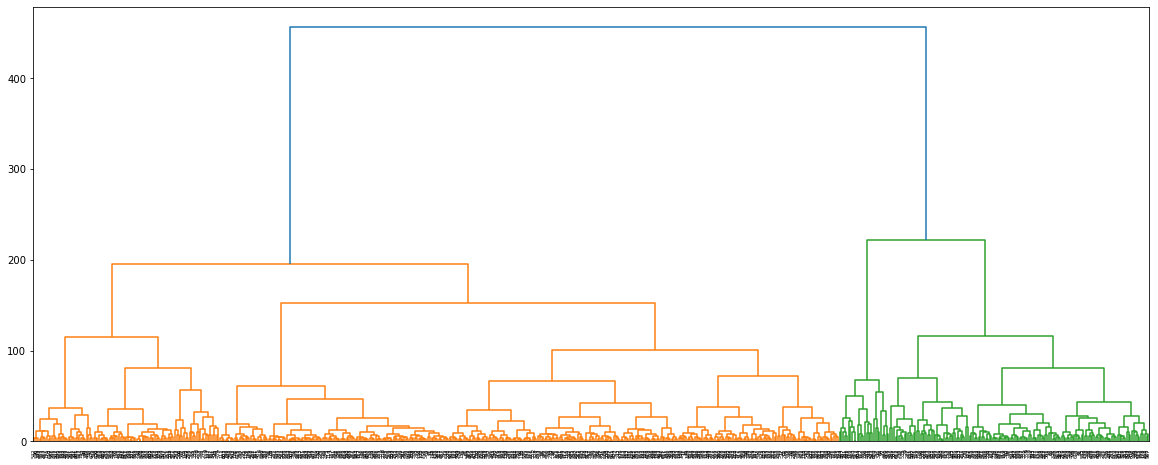

In [54]:
mergings = linkage(df, method="ward")

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

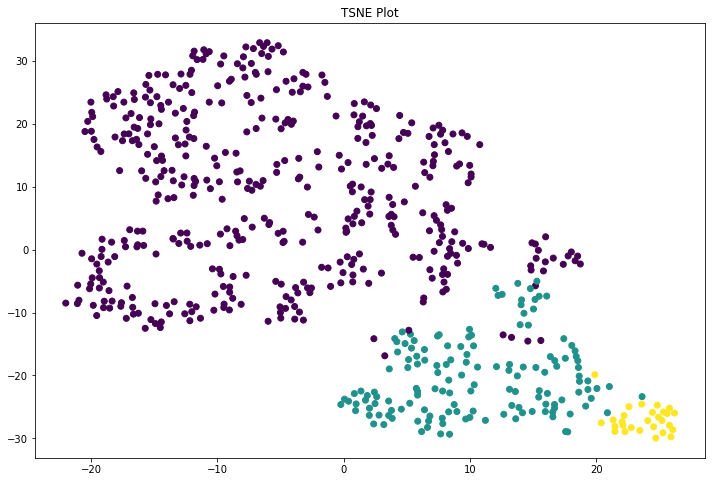

In [67]:
cluster = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward"
)

preds = cluster.fit_predict(df)
plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

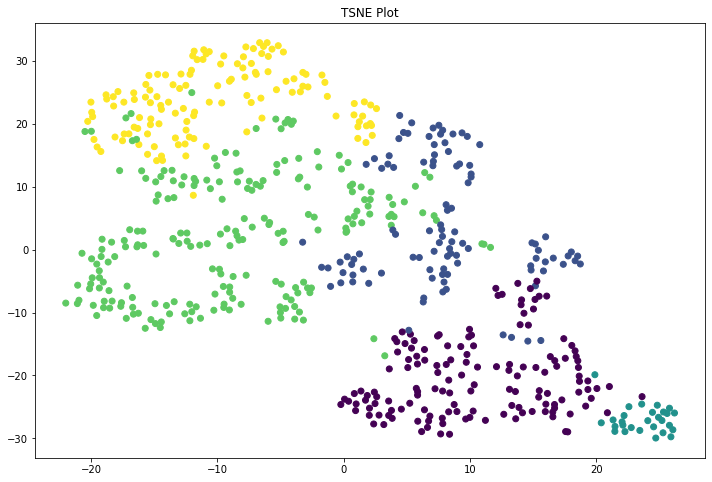

In [59]:
cluster = AgglomerativeClustering(
    n_clusters=5,
    affinity="euclidean",
    linkage="ward"
)

preds = cluster.fit_predict(df)
plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

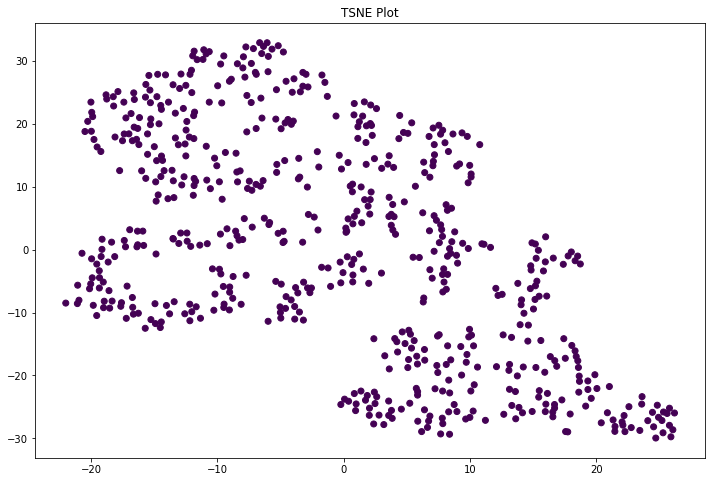

In [57]:
dbscan = DBSCAN()
dbscan.fit(df)

labels = dbscan.labels_
set(labels)


plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("TSNE Plot")
plt.show()

Conclusion: Comparatively, each of the clustering algorithms, by way of the cluster patterns, show congruency and strong suppor for a case of 3 clusters. The DBSCAN algorithm is the exception, showing no color differation for its single cluster as each its points relate to the same single cluster. However, looking at the t-SNE plots and the dendogram, an arguement can be made in support of 5 upto 8 clusters, but I conclude that 3 cluster show the most distinction and consistency among the various algorithms. For the dendogram, this would look like 2 distinct orange and 1 green group or cluster.